# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform feature selection. 

👇 Run the cell below to load your preprocessed dataset.

In [365]:
import pandas as pd

data = pd.read_csv("data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,no garage,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,1.0,0.0,0.0,0.500000,1.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,1.0,0.0,0.0,0.866025,1.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,1.0,0.0,0.0,-0.866025,1.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,1.0,0.0,0.500000,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,1.0,0.0,0.0,-0.500000,1.0


# Collinearity investigation

👇 Plot a heatmap of the Pearson Correlation between the dataset columns.

In [366]:
# YOUR CODE HERE
data.corr()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,no garage,sin_MoSold,cos_MoSold
GrLivArea,1.000000,0.519712,0.100093,-0.078781,0.040333,0.093068,0.707685,0.284965,0.081731,-0.252809,-0.150300,-0.073403,NaN
BedroomAbvGr,0.519712,1.000000,0.198597,0.012980,0.044256,0.007872,0.168213,-0.005864,-0.008591,0.009897,0.006672,-0.037216,NaN
KitchenAbvGr,0.100093,0.198597,1.000000,-0.087001,-0.009661,-0.246797,-0.135907,-0.104644,-0.107387,0.118812,0.152515,-0.034712,NaN
OverallCond,-0.078781,0.012980,-0.087001,1.000000,-0.065285,0.118969,-0.077856,-0.133177,-0.090723,0.203629,-0.009690,0.038322,NaN
RoofSurface,0.040333,0.044256,-0.009661,-0.065285,1.000000,-0.039777,0.018008,0.017195,0.017565,0.001162,-0.069415,-0.003969,NaN
CentralAir,0.093068,0.007872,-0.246797,0.118969,-0.039777,1.000000,0.251328,0.142203,0.162085,-0.155776,-0.251471,0.002209,NaN
SalePrice,0.707685,0.168213,-0.135907,-0.077856,0.018008,0.251328,1.000000,0.419678,0.169792,-0.410608,-0.236832,-0.065045,NaN
RFn,0.284965,-0.005864,-0.104644,-0.133177,0.017195,0.142203,0.419678,1.000000,-0.359384,-0.474129,-0.136604,0.007333,NaN
Unf,0.081731,-0.008591,-0.107387,-0.090723,0.017565,0.162085,0.169792,-0.359384,1.000000,-0.536355,-0.154532,-0.019406,NaN
Fin,-0.252809,0.009897,0.118812,0.203629,0.001162,-0.155776,-0.410608,-0.474129,-0.536355,1.000000,-0.203871,0.007033,NaN


👇 Visualize the correlation between column pairs in a dataframe.

<AxesSubplot:>

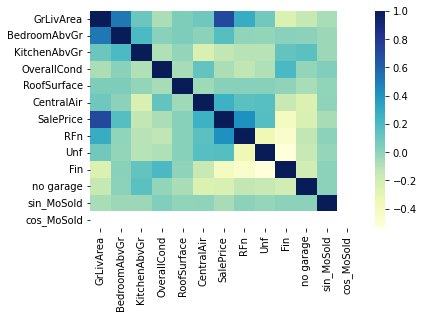

In [367]:
# YOUR CODE HERE
import seaborn as sns

corr=data.corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns,
           cmap="YlGnBu")

❓ How many pairs of features exceed a correlation of 0.9 or -0.9? Save your answer as an integer under variable name `correlated_features`

In [368]:
# YOUR CODE HERE
correlated_features=corr.unstack()
correlated_features.head(15)

GrLivArea     GrLivArea       1.000000
              BedroomAbvGr    0.519712
              KitchenAbvGr    0.100093
              OverallCond    -0.078781
              RoofSurface     0.040333
              CentralAir      0.093068
              SalePrice       0.707685
              RFn             0.284965
              Unf             0.081731
              Fin            -0.252809
              no garage      -0.150300
              sin_MoSold     -0.073403
              cos_MoSold           NaN
BedroomAbvGr  GrLivArea       0.519712
              BedroomAbvGr    1.000000
dtype: float64

In [369]:
corr

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,no garage,sin_MoSold,cos_MoSold
GrLivArea,1.000000,0.519712,0.100093,-0.078781,0.040333,0.093068,0.707685,0.284965,0.081731,-0.252809,-0.150300,-0.073403,NaN
BedroomAbvGr,0.519712,1.000000,0.198597,0.012980,0.044256,0.007872,0.168213,-0.005864,-0.008591,0.009897,0.006672,-0.037216,NaN
KitchenAbvGr,0.100093,0.198597,1.000000,-0.087001,-0.009661,-0.246797,-0.135907,-0.104644,-0.107387,0.118812,0.152515,-0.034712,NaN
OverallCond,-0.078781,0.012980,-0.087001,1.000000,-0.065285,0.118969,-0.077856,-0.133177,-0.090723,0.203629,-0.009690,0.038322,NaN
RoofSurface,0.040333,0.044256,-0.009661,-0.065285,1.000000,-0.039777,0.018008,0.017195,0.017565,0.001162,-0.069415,-0.003969,NaN
CentralAir,0.093068,0.007872,-0.246797,0.118969,-0.039777,1.000000,0.251328,0.142203,0.162085,-0.155776,-0.251471,0.002209,NaN
SalePrice,0.707685,0.168213,-0.135907,-0.077856,0.018008,0.251328,1.000000,0.419678,0.169792,-0.410608,-0.236832,-0.065045,NaN
RFn,0.284965,-0.005864,-0.104644,-0.133177,0.017195,0.142203,0.419678,1.000000,-0.359384,-0.474129,-0.136604,0.007333,NaN
Unf,0.081731,-0.008591,-0.107387,-0.090723,0.017565,0.162085,0.169792,-0.359384,1.000000,-0.536355,-0.154532,-0.019406,NaN
Fin,-0.252809,0.009897,0.118812,0.203629,0.001162,-0.155776,-0.410608,-0.474129,-0.536355,1.000000,-0.203871,0.007033,NaN


In [370]:
correlated_features=correlated_features.reset_index()
correlated_features.head()

,level_0,level_1,0
0,GrLivArea,GrLivArea,1.000000
1,GrLivArea,BedroomAbvGr,0.519712
2,GrLivArea,KitchenAbvGr,0.100093
3,GrLivArea,OverallCond,-0.078781
4,GrLivArea,RoofSurface,0.040333


In [371]:
correlated_features.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [372]:
correlated_features.columns=['feature_1','feature_2', 'correlation']


In [373]:
correlated_features.head()

,feature_1,feature_2,correlation
0,GrLivArea,GrLivArea,1.000000
1,GrLivArea,BedroomAbvGr,0.519712
2,GrLivArea,KitchenAbvGr,0.100093
3,GrLivArea,OverallCond,-0.078781
4,GrLivArea,RoofSurface,0.040333


In [374]:
correlated_features.sort_values(by="correlation",ascending=False,inplace=True)


In [375]:
correlated_features=correlated_features[correlated_features["feature_1"]!=correlated_features["feature_2"]]

correlated_features

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
13,BedroomAbvGr,GrLivArea,0.519712
1,GrLivArea,BedroomAbvGr,0.519712
97,RFn,SalePrice,0.419678
...,...,...,...
163,cos_MoSold,RFn,NaN
164,cos_MoSold,Unf,NaN
165,cos_MoSold,Fin,NaN
166,cos_MoSold,no garage,NaN


In [376]:
# ❓ How many pairs of features exceed a correlation of 0.9 or -0.9? 
# Save your answer as an integer under variable name correlated_features


In [377]:
correlated_features.count()

feature_1      156
feature_2      156
correlation    132
dtype: int64

In [378]:
correlated_features.shape

(156, 3)

In [379]:
# ❓ How many pairs of features exceed a correlation of 0.9 or -0.9? 
correlated_features=correlated_features[correlated_features["correlation"] > 0.9].count()+\
correlated_features[correlated_features["correlation"] < -0.9].count()

In [380]:
correlated_features

feature_1      0
feature_2      0
correlation    0
dtype: int64

In [381]:
pd.DataFrame(correlated_features)

,0
feature_1,0
feature_2,0
correlation,0


In [382]:
correlated_features=correlated_features[2]

In [383]:
correlated_features

0

### ☑️ Test your code

In [384]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [385]:
data.head(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,no garage,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,1.0,0.0,0.0,0.500000,1.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,1.0,0.0,0.0,0.866025,1.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,1.0,0.0,0.0,-0.866025,1.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,1.0,0.0,0.500000,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,1.0,0.0,0.0,-0.500000,1.0
5,-0.157590,0.125,0.333333,0.500,0.109764,1.0,143000,0.0,0.0,1.0,0.0,-1.000000,1.0
6,0.355350,0.375,0.333333,0.500,0.508090,1.0,307000,0.0,1.0,0.0,0.0,-0.500000,1.0
7,0.967169,0.375,0.333333,0.625,0.789729,1.0,200000,0.0,1.0,0.0,0.0,-0.866025,1.0
8,0.478949,0.250,0.666667,0.500,0.190875,1.0,129900,0.0,0.0,1.0,0.0,1.000000,1.0
9,-0.597914,0.250,0.666667,0.625,0.371391,1.0,118000,0.0,1.0,0.0,0.0,0.000000,1.0


In [387]:
data.dtypes

GrLivArea       float64
BedroomAbvGr    float64
KitchenAbvGr    float64
OverallCond     float64
RoofSurface     float64
CentralAir      float64
SalePrice         int64
RFn             float64
Unf             float64
Fin             float64
no garage       float64
sin_MoSold      float64
cos_MoSold      float64
dtype: object

In [388]:
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'CentralAir', 'SalePrice', 'RFn', 'Unf', 'Fin',
       'no garage', 'sin_MoSold', 'cos_MoSold'],
      dtype='object')

In [389]:
# YOUR CODE HERE
X=data.drop(columns="SalePrice")
y=data["SalePrice"]

In [391]:
X

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,RFn,Unf,Fin,no garage,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,0.0,1.0,0.0,0.0,0.500000,1.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,0.0,1.0,0.0,0.0,0.866025,1.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,0.0,1.0,0.0,0.0,-0.866025,1.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,0.0,0.0,1.0,0.0,0.500000,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,0.0,1.0,0.0,0.0,-0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,1.0,0.0,1.0,0.0,0.0,-0.500000,1.0
1456,0.940904,0.375,0.333333,0.625,0.459996,1.0,0.0,0.0,1.0,0.0,0.500000,1.0
1457,1.353418,0.500,0.333333,1.000,0.036147,1.0,0.0,1.0,0.0,0.0,0.866025,1.0
1458,-0.596369,0.250,0.333333,0.625,0.648667,1.0,0.0,0.0,1.0,0.0,1.000000,1.0


👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [395]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model=LinearRegression()
scores=cross_val_score(model,X,y,cv=10)
base_model_score=scores.mean()


### ☑️ Test your code

In [396]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [397]:
# YOUR CODE HERE
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression().fit(X,y)

permutation_score=permutation_importance(log_model,X,y,n_repeats=10)
permutation_score
# importance_data=pd.DataFrame(np.vstack((X.columns,permutation_importance)))
# importance_data

{'importances_mean': array([ 1.28767123e-02,  2.12328767e-03, -7.53424658e-04,  1.09589041e-03,
         6.84931507e-05,  5.54794521e-03,  7.39726027e-03,  4.17808219e-03,
         6.16438356e-03,  2.60273973e-03,  5.27397260e-03,  0.00000000e+00]),
 'importances_std': array([0.00230853, 0.00064616, 0.00056895, 0.00130677, 0.00266067,
        0.00094163, 0.00224674, 0.0020191 , 0.00304775, 0.00079876,
        0.00307915, 0.        ]),
 'importances': array([[ 0.01232877,  0.01232877,  0.01232877,  0.01232877,  0.00890411,
          0.01575342,  0.00958904,  0.01643836,  0.01438356,  0.01438356],
        [ 0.00205479,  0.00273973,  0.00273973,  0.00342466,  0.00136986,
          0.00136986,  0.00205479,  0.00205479,  0.00136986,  0.00205479],
        [-0.00068493, -0.00136986,  0.00068493, -0.00136986, -0.00136986,
         -0.00068493, -0.00068493, -0.00068493, -0.00068493, -0.00068493],
        [ 0.00136986,  0.00342466,  0.00136986,  0.00205479, -0.00068493,
          0.00136986,  0.

In [398]:
permutation_score.importances_mean

array([ 1.28767123e-02,  2.12328767e-03, -7.53424658e-04,  1.09589041e-03,
        6.84931507e-05,  5.54794521e-03,  7.39726027e-03,  4.17808219e-03,
        6.16438356e-03,  2.60273973e-03,  5.27397260e-03,  0.00000000e+00])

In [399]:
pd.DataFrame(np.vstack((X.columns,permutation_score.importances_mean)).T)

,0,1
0,GrLivArea,0.012877
1,BedroomAbvGr,0.002123
2,KitchenAbvGr,-0.000753
3,OverallCond,0.001096
4,RoofSurface,0.000068
5,CentralAir,0.005548
6,RFn,0.007397
7,Unf,0.004178
8,Fin,0.006164
9,no garage,0.002603


In [400]:
importance_data=pd.DataFrame(np.vstack((X.columns,permutation_score.importances_mean)).T)
importance_data.columns=['feature','score decrease']

importance_data

,feature,score decrease
0,GrLivArea,0.012877
1,BedroomAbvGr,0.002123
2,KitchenAbvGr,-0.000753
3,OverallCond,0.001096
4,RoofSurface,0.000068
5,CentralAir,0.005548
6,RFn,0.007397
7,Unf,0.004178
8,Fin,0.006164
9,no garage,0.002603


In [401]:
importance_data.sort_values(by="score decrease",ascending=False)

,feature,score decrease
0,GrLivArea,0.012877
6,RFn,0.007397
8,Fin,0.006164
5,CentralAir,0.005548
10,sin_MoSold,0.005274
7,Unf,0.004178
9,no garage,0.002603
1,BedroomAbvGr,0.002123
3,OverallCond,0.001096
4,RoofSurface,0.000068


❓ Which feature is the most important? Save your answer as a `string` under variable name `best_feature`.

In [402]:
# YOUR CODE HERE
best_feature="GrLivArea"

### ☑️ Test your code

In [403]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [410]:
# YOUR CODE HERE
importance_data.sort_values(by="score decrease",ascending=False)



,feature,score decrease
0,GrLivArea,0.012877
6,RFn,0.007397
8,Fin,0.006164
5,CentralAir,0.005548
10,sin_MoSold,0.005274
7,Unf,0.004178
9,no garage,0.002603
1,BedroomAbvGr,0.002123
3,OverallCond,0.001096
4,RoofSurface,0.000068


In [411]:
X=data.drop(columns=["SalePrice","RoofSurface","KitchenAbvGr","cos_MoSold","BedroomAbvGr"])
y=data["SalePrice"]
X

,GrLivArea,OverallCond,CentralAir,RFn,Unf,Fin,no garage,sin_MoSold
0,0.380070,0.500,1.0,0.0,1.0,0.0,0.0,0.500000
1,-0.312090,0.875,1.0,0.0,1.0,0.0,0.0,0.866025
2,0.497489,0.500,1.0,0.0,1.0,0.0,0.0,-0.866025
3,0.390885,0.500,1.0,0.0,0.0,1.0,0.0,0.500000
4,1.134029,0.500,1.0,0.0,1.0,0.0,0.0,-0.500000
...,...,...,...,...,...,...,...,...
1455,0.282735,0.500,1.0,0.0,1.0,0.0,0.0,-0.500000
1456,0.940904,0.625,1.0,0.0,0.0,1.0,0.0,0.500000
1457,1.353418,1.000,1.0,0.0,1.0,0.0,0.0,0.866025
1458,-0.596369,0.625,1.0,0.0,0.0,1.0,0.0,1.000000


In [414]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model=LinearRegression()
scores=cross_val_score(model,X,y,cv=10)
simplified_model_score=base_model_score=scores.mean()
simplified_model_score

0.6136438392045898

### ☑️ Test your code

In [415]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


# 🏁